In [2]:
import pandas as pd

In [3]:
titanic_df = pd.read_csv('E:/Data-Alchemy/Kaggle Competitions/Titanic Survivor/train.csv')

Read more about this function by running `pd.read_csv?`

In [4]:
# Accessing Columns
print titanic_df['Name'].head() # one column
print titanic_df[['Name', 'Pclass']].head() # Two columns

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object
                                                Name  Pclass
0                            Braund, Mr. Owen Harris       3
1  Cumings, Mrs. John Bradley (Florence Briggs Th...       1
2                             Heikkinen, Miss. Laina       3
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1
4                           Allen, Mr. William Henry       3


In [5]:
titanic_df.shape

(891, 12)

---
### Looking at the data

- We know that women and children were more likely to survive. Thus, Age and Sex are probably good predictors. 

- It's also logical to think that passenger class might affect the outcome, as first class cabins were closer to the deck of the ship. 

- Fare is tied to passenger class, and will probably be highly correlated with it, but might add some additional information. 

- Number of siblings and parents/children will probably be correlated with survival one way or the other, as either there are more people to help you, or more people to think about and try to save.

### Some more information from inspecting the data

- Age, Cabin have missing values

---

### Steps in the Data Science Process

1. Data Inspection
2. Data Understanding
3. Data Preparation (cleaning - treat missing values, treat outliers and other bad data, Normalization)
4. Split the Data
5. Visualize
6. Train the Model
7. Test the Model (deploy on unseen data)
8. Evaluate the performance of the Model

---

### Statistical Summaries using `describe()`

In [6]:
titanic_df.describe()

E:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Numeric Series - Binary
titanic_df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [8]:
# Numeric Series - Float
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [9]:
# Categorical Series
titanic_df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [ ]:
titanic_df['Pclass'].value_counts()

---

### The `plot()` method to inspect data visually

In [11]:
import matplotlib.pyplot as plt
%pylab inline

# This will enable plotting functionality
# and make sure the plots are displayed inside the notebook

Populating the interactive namespace from numpy and matplotlib


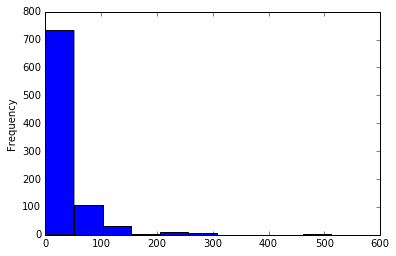

In [12]:
titanic_df['Fare'].plot(kind="hist")

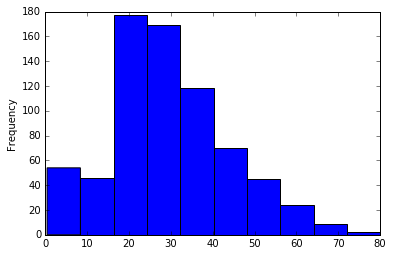

In [13]:
titanic_df['Age'].plot(kind="hist")

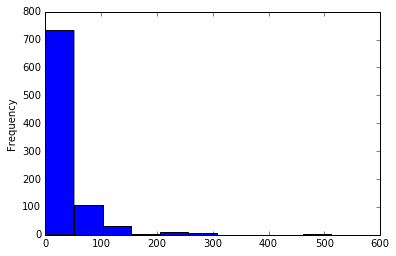

In [14]:
titanic_df['Fare'].plot(kind='hist')
# Fare is an example of a SKEWED variable

In [15]:
print titanic_df.Fare.mean()
print titanic_df.Fare.median()

32.2042079686
14.4542


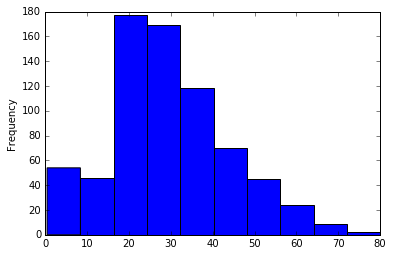

In [16]:
titanic_df['Age'].plot(kind="hist")
# Age is an example of a (approximately) Normally Distributed Variable

In [ ]:
titanic_df['Parch'].plot(kind="hist")

In [ ]:
titanic_df['Parch'].value_counts().plot(kind='bar')

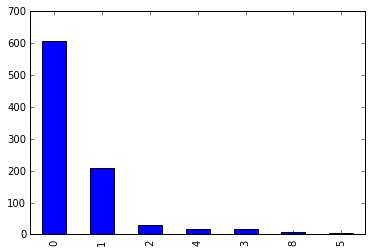

In [18]:
titanic_df['SibSp'].value_counts().plot(kind='bar')

---

### The `groupby()` method to inspect relationships in the data

- Pretty much the same as the SQL group-by.
- Can also interpret it as having the same functionality as Pivot Tables in Excel.

In [19]:
titanic_df[['Survived', 'Age', 'Fare']].groupby('Survived').mean()

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


In [20]:
titanic_df[['Pclass', 'Survived', 'Age', 'Fare']].groupby('Pclass').median()

,Survived,Age,Fare
Pclass,,,
1,1,37.0,60.2875
2,0,29.0,14.2500
3,0,24.0,8.0500


In [ ]:
# Task 3
#
# Group by number of siblings and see how much they paid on average for a ticket
#
#

In [ ]:
titanic_df[['SibSp', 'Fare']].groupby('SibSp').mean()

In [ ]:
# Task 4
#
# What is the % of survivors by Pclass
#
#

In [ ]:
titanic_df.Survived.mean() == titanic_df['Survived'].mean()

In [ ]:
titanic_df[['Pclass', 'Survived']].groupby('Pclass').mean()

---

### Handling Missing Data with `fillna()`

As we can see that PassengerId counr is 891 whereas Age count is 714. It means there are 77 rows in which Age is missing.

This means that the data isn't perfectly clean, and we're going to have to clean it ourselves. 

Note:

- We don't want to have to remove the rows with missing values, because more data helps us train a better algorithm. 
- We also don't want to get rid of the whole column, as age is probably fairly important to our analysis.

There are many strategies for cleaning up missing data, but a simple one is to just fill in all the missing values with the median of all the values in the column. 

---
#### Fill Missing Values for the Age Variable (Numeric)

In [21]:
titanic_df['Age'].isnull().tail()

886    False
887    False
888     True
889    False
890    False
Name: Age, dtype: bool

In [22]:
# we can get the median of the column by applying median function on it.
print titanic_df["Age"].median()
print titanic_df["Age"].mean()

28.0
29.6991176471


In [23]:
Age_median = titanic_df["Age"].median()

In [24]:
# Using the fillna method to impute datab
titanic_df["Age"].fillna(Age_median, inplace=True)
# Alternate method
titanic_df["Age"] = titanic_df["Age"].fillna(Age_median)

In [25]:
titanic_df['Age'].tail()

886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, dtype: float64

In [26]:
titanic_df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

---

#### Fill Missing Values for the Embarked Variable (Categorical)

In [27]:
# Task 5
# Find some rows that have missing values for variable Embarked
titanic_df[titanic_df.Embarked.isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [28]:
# To find the mode
titanic_df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [29]:
# Task 6
# Find the mode of Embarked
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
# Task 7
# Use the .fillna() method to impute missing values
titanic_df.Embarked.fillna('S', inplace=True)

---

### Convert Categoricals into Binary Variables

In [ ]:
titanic_df.loc[titanic_df['Sex'] == 'male', 'Sex'] = 0
titanic_df.loc[titanic_df['Sex'] == 'female', 'Sex'] = 1

In [31]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# Task 8
#
# Convert Embarked into a binary variable

In [ ]:
titanic_df.Embarked.value_counts()

In [ ]:
# convert "S" to 0, "C" to 1 and "Q" to 2 in Embarked column
titanic_df.loc[titanic_df["Embarked"] == "S", "Embarked"] = 0
titanic_df.loc[titanic_df["Embarked"] == "C", "Embarked"] = 1
titanic_df.loc[titanic_df["Embarked"] == "Q", "Embarked"] = 1

#print the unique values of Embarked column
print(titanic_df["Embarked"].unique())

---
### Essentials of Modeling (Overfitting and Cross Validation)

> The aim of all machine learning is generalization.

We want to train the algorithm on different data than we make predictions on. This is critical if we want to avoid overfitting. Overfitting is what happens when a model fits itself to "noise", not signal. Every dataset has its own quirks that don't exist in the full population. For example, if I asked you to predict the top speed of a car from its horsepower and other characteristics, and gave you a dataset that randomly had cars with very high top speeds, you would create a model that overstated speed. The way to figure out if your model is doing this is to evaluate its performance on data it hasn't been trained using.

Every machine learning algorithm can overfit, although some (like linear regression) are much less prone to it. If you evaluate your algorithm on the same dataset that you train it on, it's impossible to know if it's performing well because it overfit itself to the noise, or if it actually is a good algorithm.

Luckily, cross validation is a simple way to avoid overfitting. To cross validate, you split your data into some number of parts (or "folds"). Lets use 3 as an example. You then do this:
* Combine the first two parts, train a model, make predictions on the third.

* Combine the first and third parts, train a model, make predictions on the second.

* Combine the second and third parts, train a model, make predictions on the first.

This way, we generate predictions for the whole dataset without ever evaluating accuracy on the same data we train our model using.

In [ ]:
titanic_df.columns.values

In [ ]:
# The columns we'll use to predict the target
predictors_dim = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

A short note on using Scikit Learn

- There are model families from which we import Estimators
- Declaring an estimator object exposes its methods to us
- These include fit, transform and predict
- Paramters are defined when declaring the Estimator object

In [1]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit()

## Logistic Regression

One good way to think of logistic regression is that it takes the output of a linear regression, and maps it so it is between 0 and 1. We will do this with the logit function. Passing any value through the logit function will map it to a value between 0 and 1 by "squeezing" the extreme values. This is perfect for us, because we only care about two outcomes.

Sklearn has a class for logistic regression that we can use. We'll also make things easier by using an sklearn helper function to do all of our cross validation and evaluation for us.

In [ ]:
algo2

In [ ]:
from sklearn import cross_validation as cv
from sklearn.linear_model import LogisticRegression

# Initialize our algorithm
algo2 = LogisticRegression(random_state=1)

# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)

scores = cv.cross_val_score(algo2, titanic_df[predictors_dim], titanic_df["Survived"], cv=5)
# Take the mean of the scores (because we have one for each fold)

print(scores.mean())

In [ ]:
algo2.

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc_obj = SVC(kernel='linear')
svc_scores = cv.cross_val_score(svc_obj, titanic_df[predictors_dim], titanic_df["Survived"], cv=5)
print svc_scores.mean()

---
### Lets process the test case

Process titanic_test the same way we processed titanic.

This involved:

Replace the missing values in the "Age" column with the median age from the train set. The age has to be the exact same value we replaced the missing ages in the training set with (it can't be the median of the test set, because this is different). You should use titanic["Age"].median() to find the median.

Replace any male values in the Sex column with 0, and any female values with 1.

Fill any missing values in the Embarked column with S.

In the Embarked column, replace S with 0, C with 1, and Q with 2.

We'll also need to replace a missing value in the Fare column. Use .fillna with the median of the column in the test set to replace this. There are no missing values in the Fare column of the training set, but test sets can sometimes be different.

In [ ]:
titanic_test = pd.read_csv('/root/hackerday/01_titanic/test.csv')
titanic_test["Age"] = titanic_test["Age"].fillna(titanic_df["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0 
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2


In [ ]:
# Initialize the algorithm class
alg = LogisticRegression(random_state=1)

# Train the algorithm using all the training data
alg.fit(titanic_df[predictors_dim], titanic_df["Survived"])

# Make predictions using the test set.
predictions = alg.predict(titanic_test[predictors_dim])

# Create a new dataframe 
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })

print submission.head()

In [165]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [166]:
titanic_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2


In [163]:
alg.coef_

array([[-0.99196504,  2.60300021, -0.0341005 , -0.30937218, -0.07846287,
         0.00329483,  0.23985491]])

In [164]:
predictors_dim

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

y = -0.99 * Pclass + 2.60 * Sex - 0.03 * Age - ....